In [4]:
# !pip install shap

In [3]:
import shap
from sklearn.model_selection import train_test_split
X , y = shap.datasets.adult() # Numerical version of data
X_display , y_display = shap.datasets.adult(display = True) # Human - readable data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size =0.2 , random_state =7)

In [2]:
X.columns

Index(['Age', 'Workclass', 'Education-Num', 'Marital Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Country'],
      dtype='object')

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators =100, random_state =10)
clf.fit( X_train.values , y_train )

GradientBoostingClassifier(random_state=10)

In [6]:
from sklearn.metrics import accuracy_score, log_loss
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Predict on Training and Test Datasets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_train_pred_probs = clf.predict_proba(X_train) # to find log-loss
y_test_pred_probs = clf.predict_proba(X_test)

# Calculate zero-one classification error for train and test sets
train_error = 1 - accuracy_score(y_train, y_train_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)

# Calculate log-loss for train and test sets
train_log_loss = log_loss(y_train, y_train_pred_probs)
test_log_loss = log_loss(y_test, y_test_pred_probs)

print(f"Train Zero-One Classification Error: {train_error}")
print(f"Test Zero-One Classification Error: {test_error}")
print(f"Train Log-Loss: {train_log_loss}")
print(f"Test Log-Loss: {test_log_loss}")

Train Zero-One Classification Error: 0.13148802211302213
Test Zero-One Classification Error: 0.1337325349301397
Train Log-Loss: 0.2877588985367273
Test Log-Loss: 0.29404434478765107


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Gra

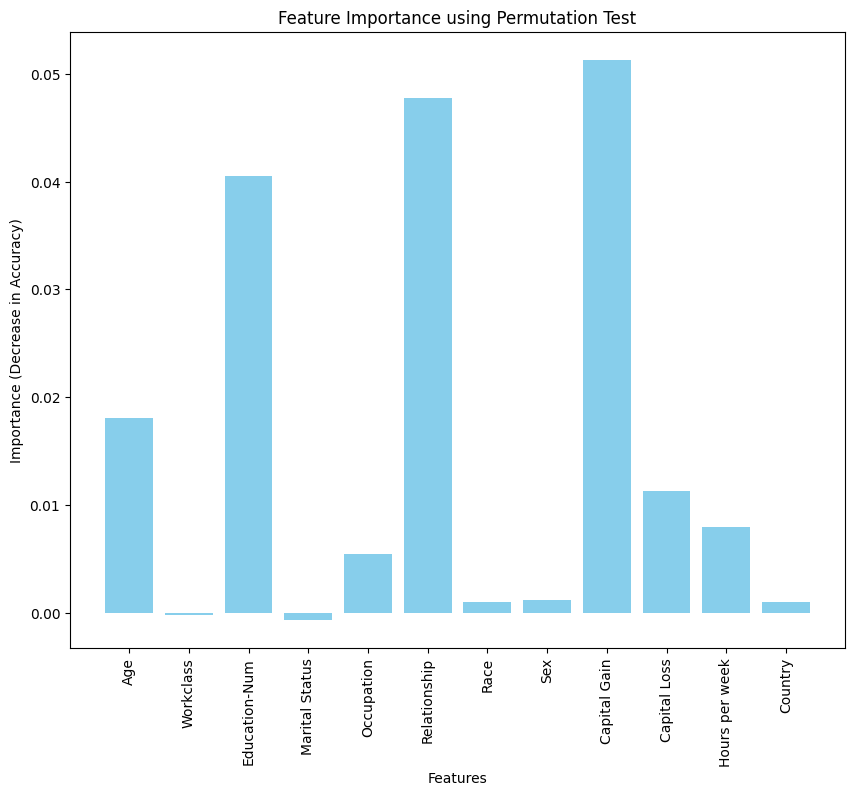

In [21]:
'''Implement the permutation test approach for the trained model. For each feature, measure the change 
in the test set zero-one error after permuting the corresponding feature column. Visualize the 
importance values with a bar plot.'''

baseline_accuracy = accuracy_score(y_test, y_test_pred)

feature_importances = {}
for feature in X_test.columns:
    original_feature = X_test[feature].copy() # saving OG columns to replace later
    np.random.shuffle(X_test[feature].values) # permuting the column 
    permuted_accuracy = accuracy_score(y_test, clf.predict(X_test))
    accuracy_change = baseline_accuracy - permuted_accuracy
    feature_importances[feature] = accuracy_change
    X_test[feature] = original_feature # replacing OG column

plt.figure(figsize=(10, 8))
plt.bar(range(X_test.shape[1]), feature_importances.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance (Decrease in Accuracy)')
plt.title('Feature Importance using Permutation Test')
plt.xticks(ticks=range(X_test.shape[1]), labels=feature_importances.keys(), rotation=90)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Gra

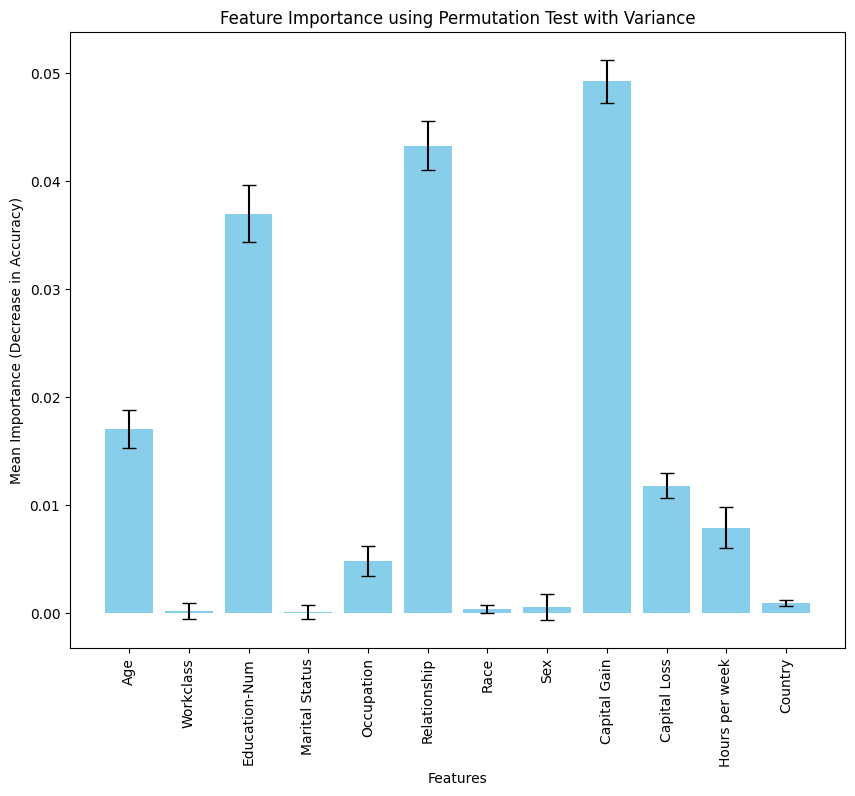

In [9]:
'''Permutation tests are inherently stochastic because they permute features randomly. Run the
permutation test from part (b) 10 times and visualize the variance in the importance values using a bar
plot with standard deviation error bars.'''

feature_importances_matrix = np.zeros((10, X_test.shape[1])) # using a matrix instead of dictionary to store accuracies (easier to calculate mean and variance)

for iteration in range(10):
    for feature in range(X_test.shape[1]):
        original_feature = X_test.iloc[:, feature].copy()
        np.random.shuffle(X_test.iloc[:, feature].values)
        permuted_accuracy = accuracy_score(y_test, clf.predict(X_test))
        accuracy_change = baseline_accuracy - permuted_accuracy
        feature_importances_matrix[iteration, feature] = accuracy_change 
        X_test.iloc[:, feature] = original_feature

# calculate the mean and standard deviation of feature importances across all iterations
mean_importances = feature_importances_matrix.mean(axis=0)
std_dev_importances = feature_importances_matrix.std(axis=0)

plt.figure(figsize=(10, 8))
plt.bar(range(X_test.shape[1]), mean_importances, yerr=std_dev_importances, color='skyblue', capsize=5)
plt.xlabel('Features')
plt.ylabel('Mean Importance (Decrease in Accuracy)')
plt.title('Feature Importance using Permutation Test with Variance')
plt.xticks(ticks=range(X_test.shape[1]), labels=X_test.columns, rotation=90)
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Gra

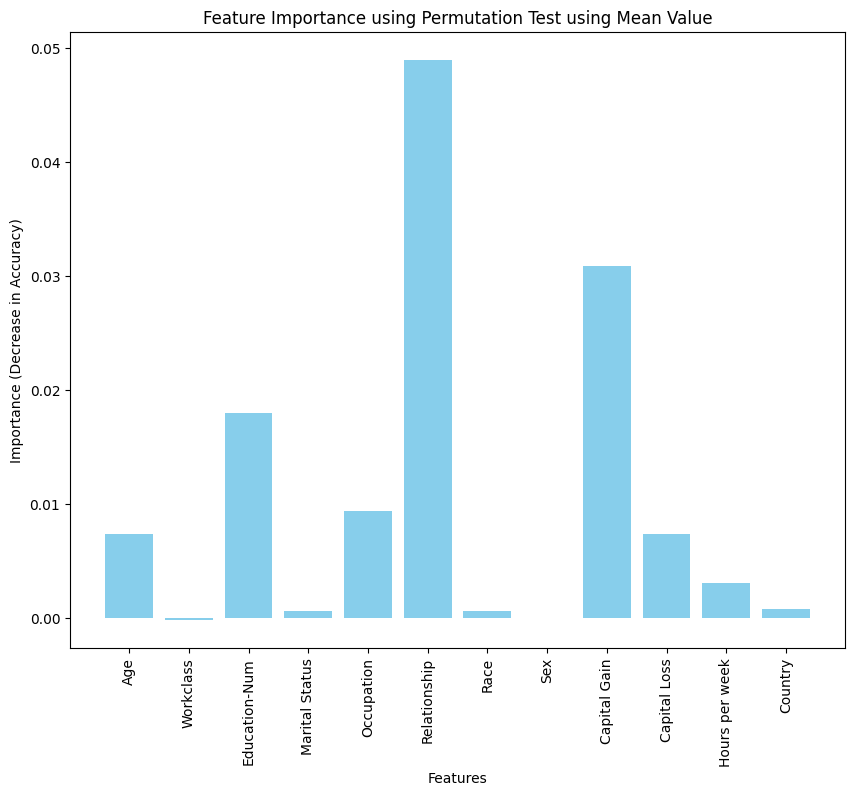

In [18]:
'''One possible variation of the permutation test is to change the feature removal approach.
Implement a new method similar to (b) that removes features by setting them to their mean instead of
permuting them. Visualize the importance values using a bar plot.'''

# baseline_accuracy = accuracy_score(y_test, y_test_pred)

feature_importances_mean = {}
for feature in X_test.columns:
    original_feature = X_test[feature].copy()
    X_test[feature] = X_test[feature].mean()
    permuted_accuracy = accuracy_score(y_test, clf.predict(X_test))
    accuracy_change = baseline_accuracy - permuted_accuracy
    feature_importances_mean[feature] = accuracy_change
    X_test[feature] = original_feature

plt.figure(figsize=(10, 8))
plt.bar(range(X_test.shape[1]), feature_importances_mean.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance (Decrease in Accuracy)')
plt.title('Feature Importance using Permutation Test using Mean Value')
plt.xticks(ticks=range(X_test.shape[1]), labels=feature_importances_mean.keys(), rotation=90)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Gra

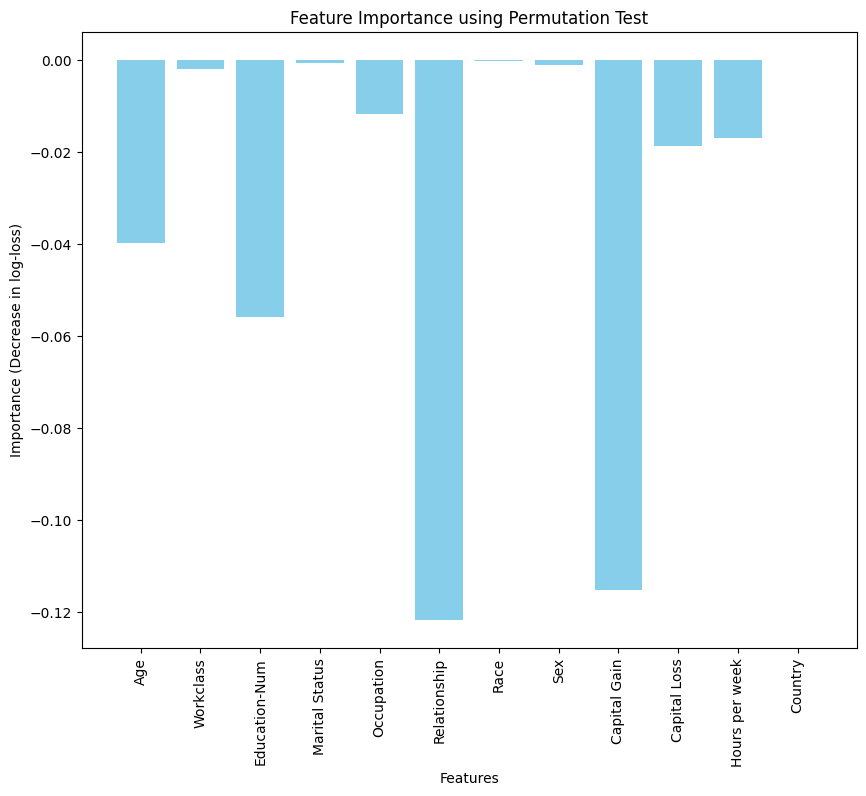

In [22]:
'''Another possible variation is to change the model behavior we measure. Implement a new
method similar to (b) that measures the change in the test set log-loss rather than the zero-one error.
Visualize the importance values using a bar plot.'''

# baseline_log_loss = test_log_loss

feature_importances_log = {}
for feature in X_test.columns:
    original_feature = X_test[feature].copy()
    np.random.shuffle(X_test[feature].values)
    permuted_log_loss = log_loss(y_test, clf.predict_proba(X_test))
    log_loss_change = test_log_loss - permuted_log_loss
    feature_importances_log[feature] = log_loss_change
    X_test[feature] = original_feature

plt.figure(figsize=(10, 8))
plt.bar(range(X_test.shape[1]), feature_importances_log.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance (Decrease in log-loss)')
plt.title('Feature Importance using Permutation Test')
plt.xticks(ticks=range(X_test.shape[1]), labels=feature_importances_log.keys(), rotation=90)
plt.show()

In [2]:
# !pip install lime

In [65]:
# TreeSHAP example

baselines = X_test[-100:]
explicands = X_test[:200]
explainer_tree = shap.TreeExplainer (clf, baselines)
attributions_tree = explainer_tree.shap_values (explicands)

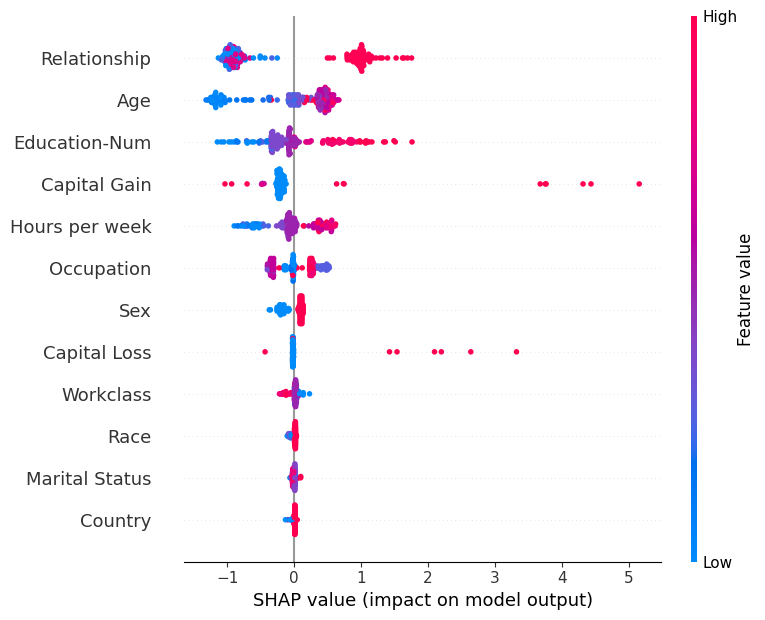

In [66]:
shap.summary_plot (attributions_tree , explicands)

In [67]:
explainer_kernel = shap.KernelExplainer(clf.predict_proba , baselines)
attributions_kernel = explainer_kernel.shap_values(explicands)

  0%|          | 0/200 [00:00<?, ?it/s]

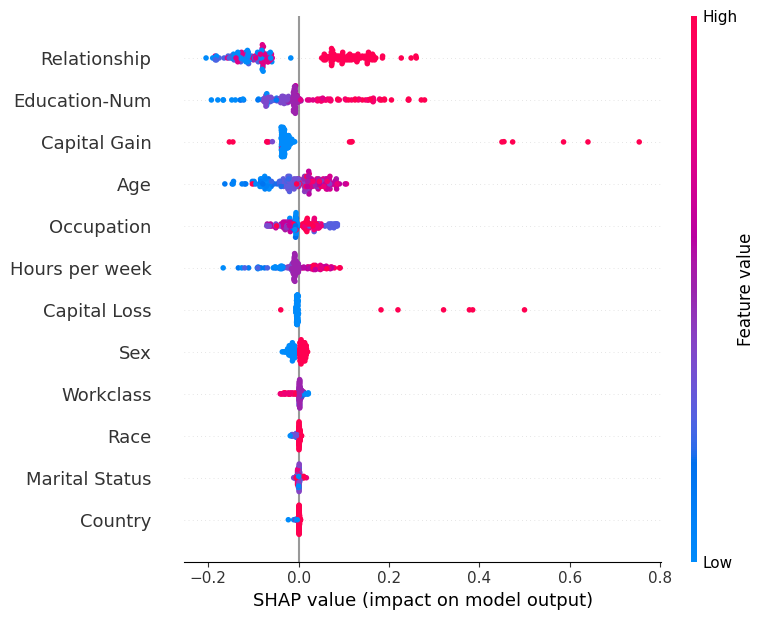

In [68]:
shap.summary_plot(attributions_kernel[:,:,1] , explicands)

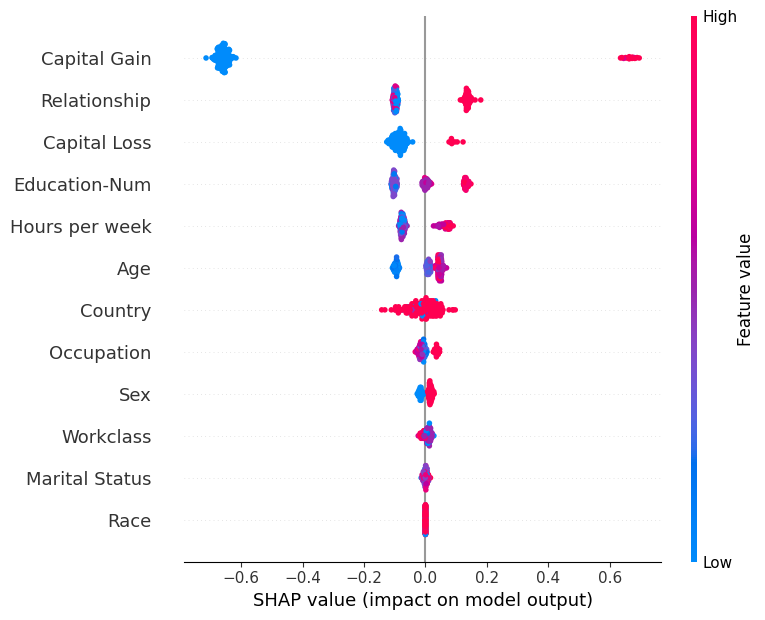

In [60]:
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values)
atts = []
for explicand in explicands.values:
    attr = explainer.explain_instance(explicand, clf.predict_proba,num_features=12).local_exp[1] # we get a list of tuples with feature index and feature contribution
    attribution = sorted(attr, key = lambda x: x[0])
    attribution = np.array([value[1] for value in attribution])
    atts.append(attribution)

attributions = np.array(atts)
shap.summary_plot(attributions,explicands)
# Note : you must reshape the attribution and run e x p l a i n _ i n s t a n c e for every explicand

In [85]:
age_idx = list(X_display.columns).index('Age')
hrs_idx = list(X_display.columns).index('Hours per week')

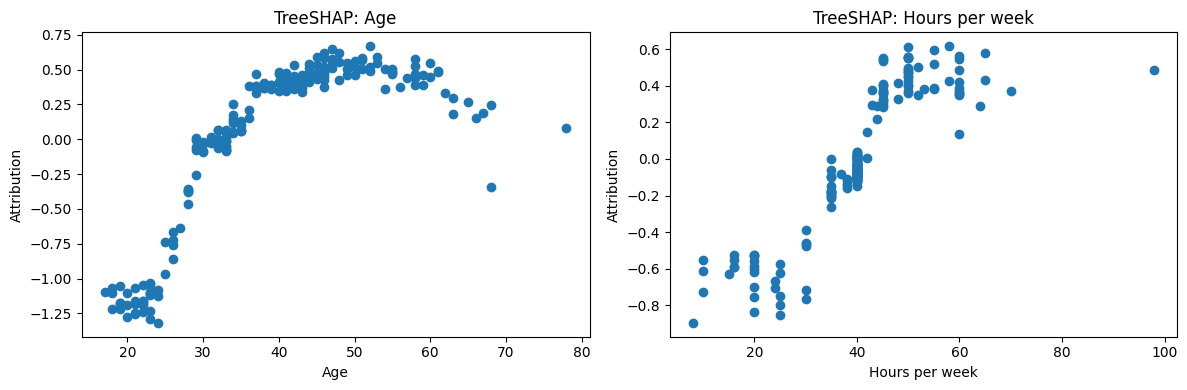

In [89]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].scatter(explicands['Age'],attributions_tree[:,age_idx])
ax[0].set_title('TreeSHAP: Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Attribution')


ax[1].scatter(explicands['Hours per week'],attributions_tree[:,hrs_idx])
ax[1].set_title('TreeSHAP: Hours per week')
ax[1].set_xlabel('Hours per week')
ax[1].set_ylabel('Attribution')
plt.tight_layout()
plt.show()

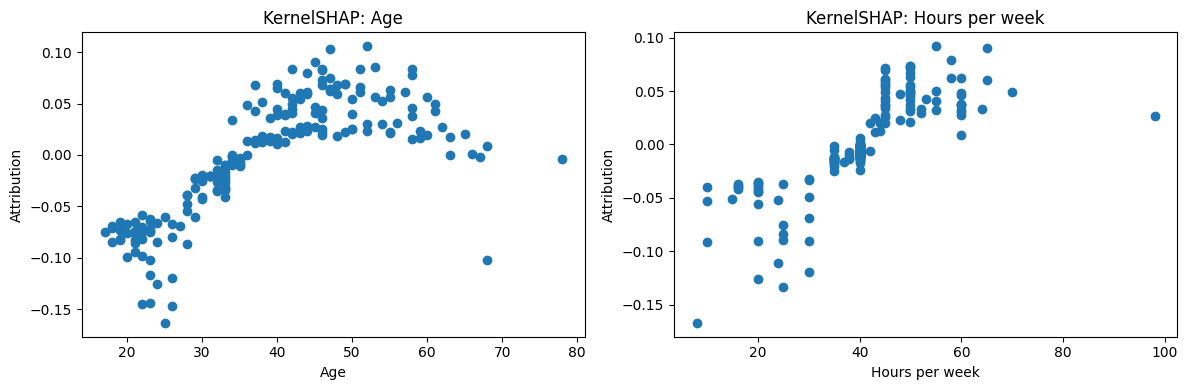

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot for Age attributions
ax[0].scatter(explicands['Age'], attributions_kernel[:, age_idx,1])
ax[0].set_title('KernelSHAP: Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Attribution')

# Plot for Hours per week attributions
ax[1].scatter(explicands['Hours per week'], attributions_kernel[:, hrs_idx,1])
ax[1].set_title('KernelSHAP: Hours per week')
ax[1].set_xlabel('Hours per week')
ax[1].set_ylabel('Attribution')

plt.tight_layout()
plt.show()


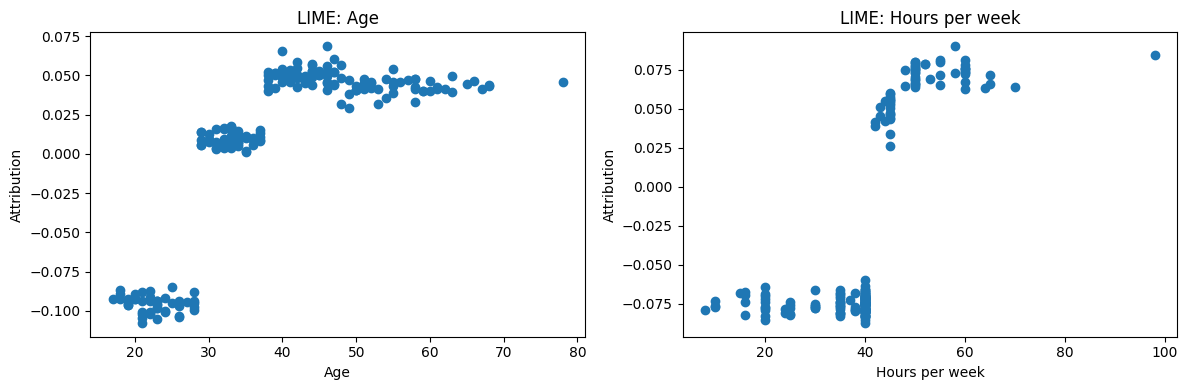

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot for Age attributions
ax[0].scatter(explicands['Age'], attributions[:, age_idx])
ax[0].set_title('LIME: Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Attribution')

# Plot for Hours per week attributions
ax[1].scatter(explicands['Hours per week'], attributions[:, hrs_idx])
ax[1].set_title('LIME: Hours per week')
ax[1].set_xlabel('Hours per week')
ax[1].set_ylabel('Attribution')

plt.tight_layout()
plt.show()

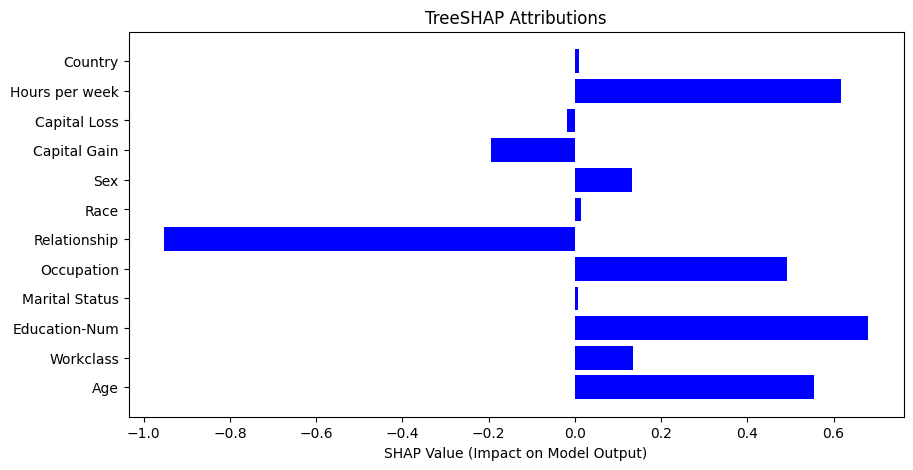

In [105]:
shap_values_tree = explainer_tree.shap_values(X_test.iloc[1])

# Plotting TreeSHAP results
plt.figure(figsize=(10, 5))
plt.barh(X_test.columns, shap_values_tree, color='blue')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('TreeSHAP Attributions')
plt.show()

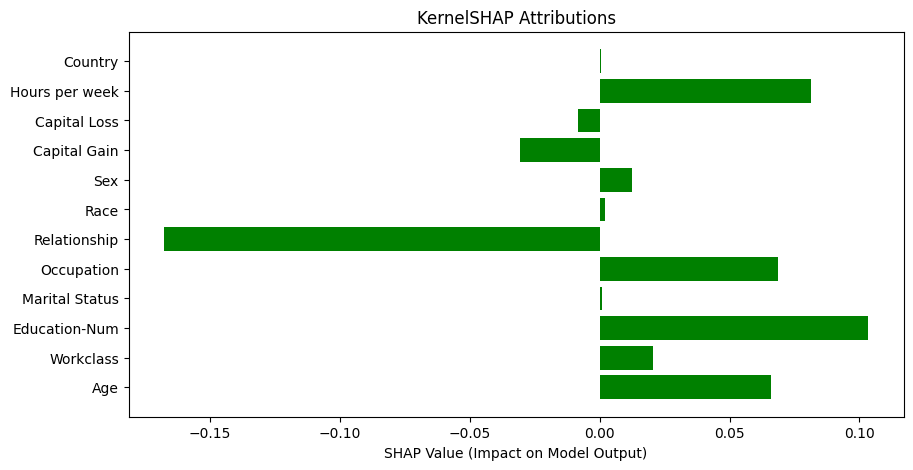

In [125]:
# You might need to reduce nsamples for quicker computation
explainer_kernel = shap.KernelExplainer(clf.predict_proba, X_train.sample(100))
shap_values_kernel = explainer_kernel.shap_values(X_test.iloc[1])[:,1]  # Class index as needed

# Plotting KernelSHAP results
plt.figure(figsize=(10, 5))
plt.barh(X_test.columns, shap_values_kernel, color='green')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('KernelSHAP Attributions')
plt.show()


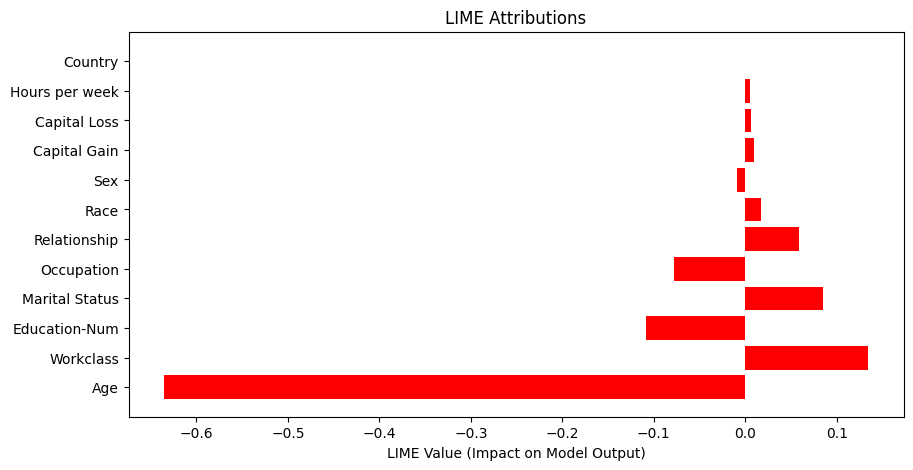

In [114]:
# Setup LIME for this specific sample
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Outcome'], mode='classification')
exp_lime = explainer_lime.explain_instance(X_test.iloc[1].values, clf.predict_proba, num_features=len(X_test.columns))
lime_attributions = np.array([exp_lime.local_exp[1][i][1] for i in range(len(X_test.columns))])  # assuming binary classification

# Plotting LIME results
plt.figure(figsize=(10, 5))
plt.barh(X_test.columns, lime_attributions, color='red')
plt.xlabel('LIME Value (Impact on Model Output)')
plt.title('LIME Attributions')
plt.show()
